In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import seaborn as sns
import nibabel as nib

In [2]:
network_num = 50

# NASCAR decomposition result from the whole ~1400 subjects from GSP dataset
nascar_rst = scipy.io.loadmat('artifact/nascar_GSP_rst.mat')['rst_50']

# extract the NASCAR spatial maps
nascar_spatial = nascar_rst[1, 0]
nascar_spatial_df = pd.DataFrame(nascar_spatial)
nascar_spatial_corr = nascar_spatial_df.corr()

In [3]:
# extract the ICA spatial maps
# ICA decomposition results downloaded from https://db.humanconnectome.org/data/projects/HCP_1200
# (1003 Subjects, recon r177 + r227, Dense Connectome)
ica_data = nib.load("artifact/groupICA_3T_HCP1200_MSMAll_d50.ica/melodic_IC.dscalar.nii")
ica_spatial = ica_data.get_fdata().T

ica_spatial_df = pd.DataFrame(ica_spatial)
ica_spatial_corr = ica_spatial_df.corr()

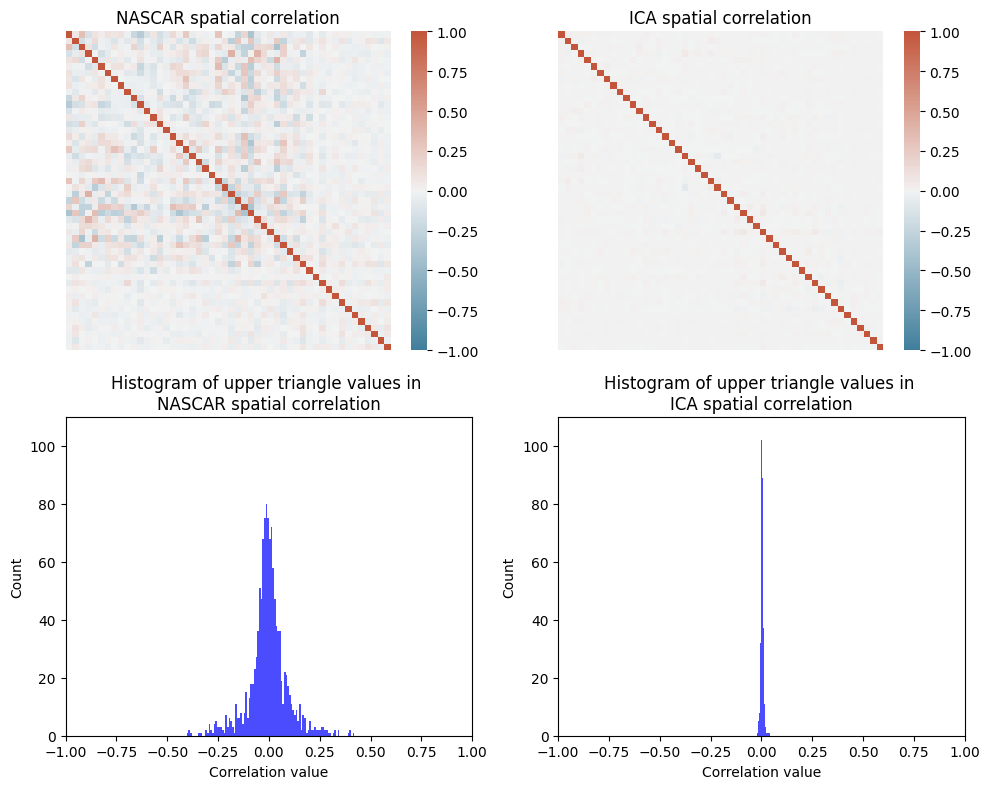

In [4]:
cmap = sns.diverging_palette(230, 20, as_cmap=True);

subfigure_width = 5
subfigure_height = 8

ymax = 110

fig, axes = plt.subplots(2, 2, figsize=(2 * subfigure_width, subfigure_height))

def get_upper_triangle(matrix):
    return matrix[np.triu_indices_from(matrix, k=1)]  # k=1 excludes the diagonal

sns.heatmap(nascar_spatial_corr.to_numpy(), ax=axes[0, 0], vmax=1.0, vmin=-1.0, center=0, cmap=cmap)
axes[0, 0].set_title("NASCAR spatial correlation")
upper_tri1 = get_upper_triangle(nascar_spatial_corr.to_numpy())
axes[1, 0].hist(upper_tri1, bins=100, color="blue", alpha=0.7)
axes[1, 0].set_xlim([-1.0, 1.0])
axes[1, 0].set_ylim([0, ymax])
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_xlabel("Correlation value")
axes[1, 0].set_title("Histogram of upper triangle values in \nNASCAR spatial correlation")

sns.heatmap(ica_spatial_corr.to_numpy(), ax=axes[0, 1], vmax=1.0, vmin=-1.0, center=0, cmap=cmap)
axes[0, 1].set_title("ICA spatial correlation")
upper_tri2 = get_upper_triangle(ica_spatial_corr.to_numpy())
axes[1, 1].hist(upper_tri2, bins=100, color="blue", alpha=0.7)
axes[1, 1].set_xlim([-1.0, 1.0])
axes[1, 1].set_ylim([0, ymax])
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_xlabel("Correlation value")
axes[1, 1].set_title("Histogram of upper triangle values in \nICA spatial correlation")

for ax in axes[0, :]:
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])  
    ax.set_yticklabels([])  

plt.tight_layout()
plt.show()